# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## 1: Plot number of people by gender

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [41]:
total = kill.groupby(kill.gender)[['name']].count()
total

,name
gender,
F,107
M,2428


In [48]:
total = total.sort_values(by=['name'], ascending=False)

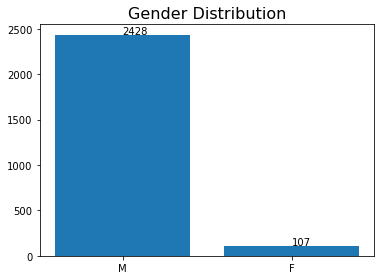

In [224]:
fig = plt.figure(figsize =(5.4, 4))
plt.bar(total.index, total.name)
plt.title('Gender Distribution', fontsize = 16)
for index,data in enumerate(total.name):
    plt.text(x=index , y =data+15 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()

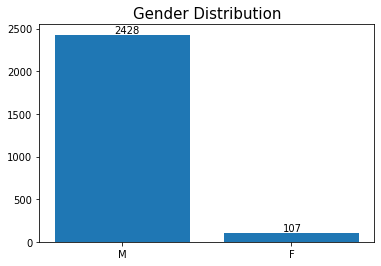

In [ ]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [65]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [67]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [78]:
weapon = kill.groupby('armed')[['name']].count().sort_values(by=['name'], ascending=False).head(7)

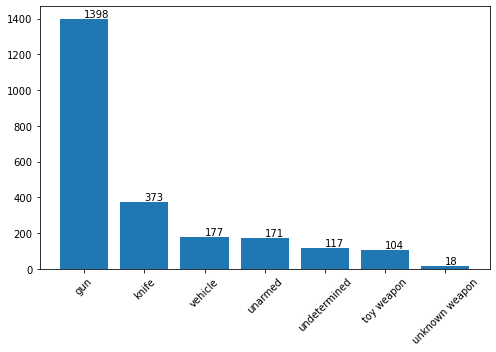

In [215]:
fig = plt.figure(figsize =(7, 5))
plt.bar(weapon.index, weapon.name)
for index,data in enumerate(weapon.name):
    plt.text(x=index , y =data+10 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

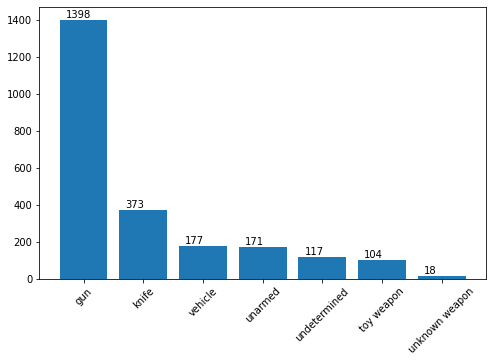

In [ ]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [95]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [99]:
kill['age_cat'] = pd.cut(kill.age, bins=[0, 25, 150], labels = ['below25', 'above25'])

In [100]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [107]:
kill.age.isnull().value_counts()

False    2458
True       77
Name: age, dtype: int64

In [108]:
kill[kill.age.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False,NaN
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False,NaN
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False,NaN
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False,NaN
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False,NaN
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False,NaN
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False,NaN
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False,NaN


In [101]:
kill.age_cat.value_counts() #77 null value var. Bunlar age_cat column da suan NaN olarak gozukuyor.

above25    1905
below25     553
Name: age_cat, dtype: int64

In [110]:
kill.age_cat.fillna('below25', inplace=True) #age_cat column daki 77 null value 'below25' olarak dolduruldu.

In [111]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

above25    1905
below25     630
Name: age_cat, dtype: int64

In [114]:
age_tot = kill.groupby('age_cat')[['name']].count()
age_tot = age_tot.sort_values(by=['name'], ascending=False)
age_tot

,name
age_cat,
above25,1905
below25,630


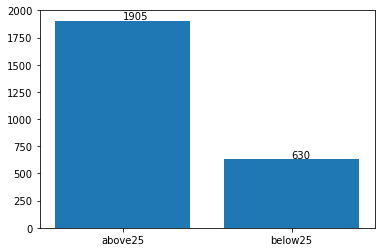

In [119]:
plt.bar(age_tot.index, age_tot.name)
for index,data in enumerate(age_tot.name):
    plt.text(x=index , y =data+10 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.show()

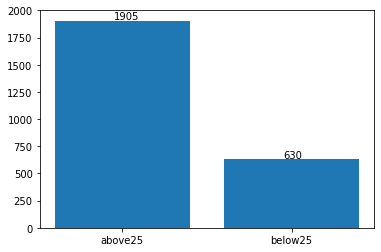

In [ ]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [123]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [140]:
kill.groupby('race')['name'].count().sort_values(ascending=False)

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: name, dtype: int64

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [143]:
racet = kill.groupby('race')[['name']].count().sort_values(by=['name'], ascending=False)

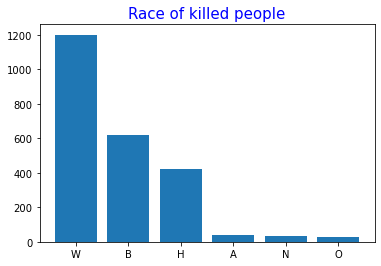

In [150]:
plt.bar(racet.index, racet.name)
plt.title('Race of killed people', fontsize=15, color = 'blue')
plt.show()

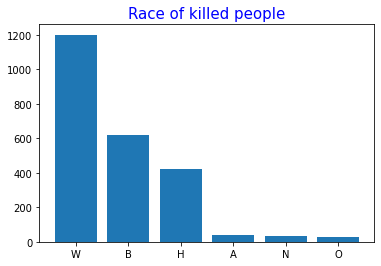

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [151]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [153]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [167]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [174]:
kill = kill.dropna(how='any')

In [175]:
kill.count()

id                         2254
name                       2254
date                       2254
manner_of_death            2254
armed                      2254
age                        2254
gender                     2254
race                       2254
city                       2254
state                      2254
signs_of_mental_illness    2254
threat_level               2254
flee                       2254
body_camera                2254
age_cat                    2254
dtype: int64

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [176]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [191]:
racea = kill.groupby('race').count().sort_values(by=['name'], ascending=False)
racea.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [206]:
racea.name.unique()

array([1168,  592,  401,   36,   29,   28])

array([1168,  592,  401,   36,   29,   28])

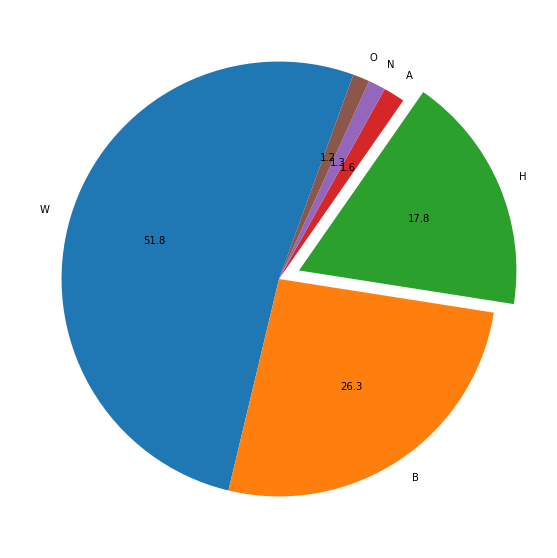

In [225]:
fig = plt.figure(figsize =(20, 10))
plt.pie(racea.name.unique(), labels = racea.index, startangle=70, explode = [0, 0, 0.1, 0, 0, 0], autopct='%.1f')
plt.show()

In [226]:
# matplotlib

